<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/Revised_Copy_of_project7ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [8]:
from scipy import integrate

def f(x):
    return x**2

result, error = integrate.quad(f, 0, 1)

print("Result:", result)
print("Error:", error)


Result: 0.33333333333333337
Error: 3.700743415417189e-15


In [3]:
# create a NumPy array
x = np.array([1, 2, 3, 4, 5])

# try to pass the entire array to a function that expects a scalar
result = 2 * x

# modify the code to extract a scalar value from the array
result = 2 * x[0]   # use indexing to extract the first element of the array
result = 2 * x[-1]  # use negative indexing to extract the last element of the array
result = 2 * x[1:3] # use slicing to extract a subset of the array, and then perform the operation

Signed area under the curve: 6.3890560989306495


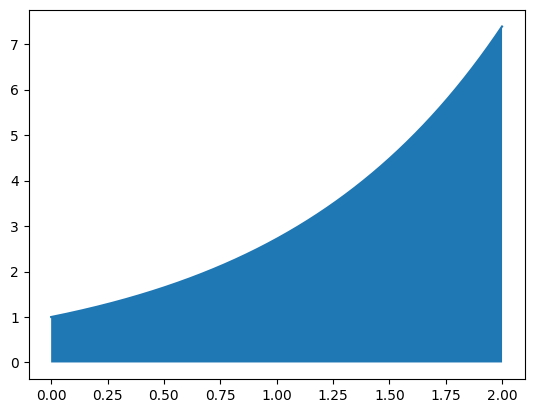

Method: left
Rectangles: 10 Riemann sum: 5.77143315830655 Error: 0.6176229406240994
Rectangles: 50 Riemann sum: 6.262126828382784 Error: 0.1269292705478655
Rectangles: 100 Riemann sum: 6.325378505058198 Error: 0.06367759387245187
Rectangles: 500 Riemann sum: 6.376286505471983 Error: 0.012769593458666684
Rectangles: 1000 Riemann sum: 6.382669172516945 Error: 0.006386926413704863
Method: right
Rectangles: 10 Riemann sum: 7.049244378092681 Error: 0.660188279162031
Rectangles: 50 Riemann sum: 6.517689072340009 Error: 0.12863297340935986
Rectangles: 100 Riemann sum: 6.45315962703681 Error: 0.06410352810616082
Rectangles: 500 Riemann sum: 6.401842729867705 Error: 0.012786630937055676
Rectangles: 1000 Riemann sum: 6.395447284714805 Error: 0.006391185784155873
Method: center
Rectangles: 10 Riemann sum: 6.410338768199615 Error: 0.021282669268965826
Rectangles: 50 Riemann sum: 6.389907950361397 Error: 0.0008518514307471747
Rectangles: 100 Riemann sum: 6.389269066047505 Error: 0.00021296711685536

In [9]:
from scipy.integrate import quad

# Define the function
def f(x):
    return np.exp(x)

# Set the interval
a = 0
b = 2

# Calculate the signed area using calculus
area = quad(f, a, b)[0]
print("Signed area under the curve:", area)

# Graph the function over the interval
x = np.linspace(a, b, 1000)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, 0, where=(x>=a)&(x<=b))
plt.show()

# Program an algorithm to compute the Riemann sum
def riemann_sum(f, a, b, n, method='left'):
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    if method == 'left':
        y = y[:-1]
    elif method == 'right':
        y = y[1:]
    elif method == 'center':
        y = (y[:-1] + y[1:]) / 2
    else:
        raise ValueError("Invalid method")
    return np.sum(y * dx)

# Compute the Riemann sum with various numbers of rectangles and methods
methods = ['left', 'right', 'center']
ns = [10, 50, 100, 500, 1000]
for method in methods:
    print("Method:", method)
    for n in ns:
        riemann = riemann_sum(f, a, b, n, method)
        error = abs(riemann - area)
        print("Rectangles:", n, "Riemann sum:", riemann, "Error:", error)


**For this portion of the project we will be looking at Simpson's Rule. Simpson's Rule approximates definite integrals by interpolating a polynomial to fit the integrand based on given points and then calculates areas under sections of the integrand based on the interpolation. The formula for Simpson's Rule can be derived from the polynomial to give us an integral estimate of $
\begin{equation*}
\int_{a}^{b}f(x)\, dx \approx \frac{b-a}{6} \big[f(a) + 4f(\frac{a+b}{2}) + f(b) \big]
\end{equation*}
$.**

In [ ]:
def simpson(a,b,n):
  h = (b-a)/(n-1)
  x = np.linspace(a,b,n)
  f = np.exp(x)
  est = ((h/3) * (f[0]+ 4*sum(f[i] for i in range(1,n-1,2)) + 2*sum(f[j] for j in range(0,n-2,2)) + f[n-1]))
  return est
estimate = simpson(1,3,15)
estimate

17.62617916620393

In [ ]:
def F(x):
  return math.exp(x)
real = scipy.integrate.quad(F,1,3)
real[0]

17.367255094728623

In [ ]:
def true_error(true,approx):
  return true - approx
true_error(real[0],estimate)

-0.25892407147530605

In [ ]:
def rel_true_error(true, approx):
 E = ((true - approx) / true) * 100
 return E
rel_true_error(real[0],estimate)

-1.4908750407765685

**Based on the error calculations, Simpson's Rule slightly underestimates the function $e^x$ by about $-1.49\%$. I would use Simpson's Rule to calculate integrals of a function that undulates such as $sin(x)$ and $cos(x)$ because polynomial interpolation mimics functions that undulate more intuitively and not so much functions that strictly increase like $e^x$, however it still produces a fairly accurate estimate.**